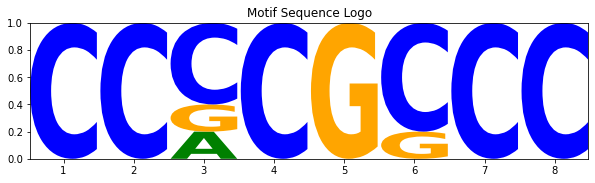

In [1]:
import matplotlib.pyplot as plt
import logomaker
import pandas as pd
from collections import defaultdict

# Example motifs from Gibbs Sampler
motifs = ["CCCCGCCC", "CCCCGCCC", "CCACGCCC", "CCCCGCCC", "CCGCGGCC"] # replace this with the motifs you found!

# Generate PWM
def generate_pwm(motifs):
    motif_length = len(motifs[0])
    pwm = defaultdict(lambda: [0] * motif_length)
    for motif in motifs:
        for i, nucleotide in enumerate(motif):
            pwm[nucleotide][i] += 1
    return pwm

# Convert PWM to DataFrame
def pwm_to_df(pwm):
    df = pd.DataFrame(pwm)
    df = df.div(df.sum(axis=1), axis=0)
    return df

pwm = generate_pwm(motifs)
pwm_df = pwm_to_df(pwm)

# Define colors for nucleotide bases
colors = {'A': 'green', 'C': 'blue', 'G': 'orange', 'T': 'red'}

# Plot sequence logo with custom colors
logo = logomaker.Logo(pwm_df, color_scheme=colors)

# Adjust the x-axis to start at x=1
plt.xticks(ticks=range(len(pwm_df)), labels=range(1, len(pwm_df) + 1))

# Set plot title
plt.title("Motif Sequence Logo")
plt.show()